# 1. Install and Import Dependencies

pytorch, pyaudio, pyvision

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 && pip install -r requirements.txt

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/shubham/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-6 Python-3.11.5 torch-2.1.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 4. Real Time Detections

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [6]:
import uuid   # Unique identifier
import os
import time

In [12]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 100 --data datas.yaml --weights runs/train/exp24/weights/last.pt --workers 2 

train: weights=runs/train/exp21/weights/last.pt, cfg=, data=datas.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 11 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-256-g43c43d8 Python-3.11.5 torch-2.1.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.931      0.985      0.992      0.431

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/99         0G    0.03477   0.009731   0.001981         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.956      0.994      0.992      0.411

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/99         0G    0.02997   0.008516   0.002093         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.804      0.931      0.919      0.517

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      12/99         0G    0.03614   0.009423   0.002841         15        640: 1
          

      34/99         0G    0.03202    0.01058   0.002027         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.928      0.936      0.934      0.426

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      35/99         0G    0.03121     0.0106   0.002833         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.968       0.98      0.978      0.493

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      36/99         0G    0.03037    0.01018   0.002332         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.919      0.926      0.906      0.475

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      37/9

      59/99         0G    0.02423   0.008826   0.001424         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.941      0.955      0.934      0.433

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      60/99         0G    0.02433   0.009564   0.001775         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.963      0.975       0.96      0.504

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      61/99         0G    0.02593    0.00867   0.001543         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.942      0.955      0.937      0.465

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      62/9

      84/99         0G    0.01944   0.008451   0.001248         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.959      0.969      0.953      0.489

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      85/99         0G    0.02003   0.008567  0.0008523         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.961      0.975      0.953      0.506

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      86/99         0G     0.0206   0.008086   0.001278         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         39      0.961      0.969      0.957      0.487

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      87/9

In [13]:
#  where we started
#       Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
#       0/199         0G      0.117    0.03338    0.05302         31        640: 1
#                  Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 1.500s exceeded
#                  Class     Images  Instances          P          R      mAP50   
#                    all         20         23    0.00121       0.05    0.00306    0.00121

# 6. Load Custom Model

In [25]:
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp24/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/shubham/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-6 Python-3.11.5 torch-2.1.2 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [26]:
img = os.path.join('/Users/shubham/Desktop/DeafInt/data/images/val/images', 'thanks.746fd4ae-abe3-11ee-a5a7-fe12e0fd86f0.jpg')

In [27]:
results = model1(img)

In [28]:
results.print()

image 1/1: 720x1280 1 thanks
Speed: 40.7ms pre-process, 172.4ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


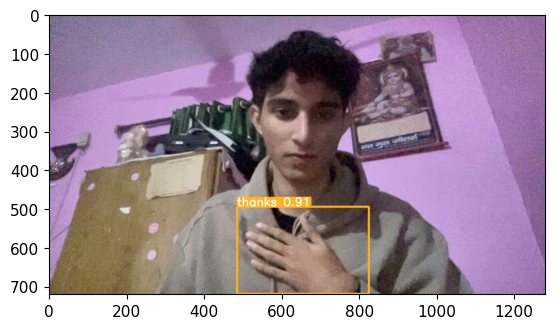

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model1(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [37]:
cap.release()
cv2.destroyAllWindows()